In [1]:
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Allows all the columns to show
pd.set_option('display.max_columns', None)

# For all row to show:
pd.set_option('display.max_rows', None)

df = pd.DataFrame()

In [2]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7dd270a5-96a6-434b-9653-5677a185bc6c',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  
  df1 = pd.json_normalize(data['data'])
  df1['timestamp'] = pd.to_datetime('now', utc=True)
  df = pd.concat([df, df1], axis=0) # for storing all in df
  df.to_csv('E:\Python\API.csv') # for CSV

In [3]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906717e+07,1.906717e+07,NaN,1,NaN,NaN,2022-06-14T10:50:00.000Z,22507.136367,6.715698e+10,14.9838,0.463751,-6.345220,-24.024455,-24.317633,-44.159704,-44.309050,4.291474e+11,45.3258,4.726499e+11,2022-06-14T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211675e+08,1.211675e+08,NaN,2,NaN,NaN,2022-06-14T10:49:00.000Z,1196.268815,4.068014e+10,6.8701,-1.024835,-2.861015,-32.319329,-41.173128,-60.594152,-55.408490,1.449489e+11,15.3092,1.449489e+11,2022-06-14T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
2,825,Tether,USDT,tether,34665,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.159913e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-14T10:49:00.000Z,0.998819,1.027722e+11,7.4896,0.017737,0.052870,-0.058325,0.000206,-0.133121,-0.153810,7.151454e+10,7.5532,7.961645e+10,2022-06-14T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-14 10:50:35.569539+00:00
3,3408,USD Coin,USDC,usd-coin,4404,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.411727e+10,5.411727e+10,NaN,4,NaN,NaN,2022-06-14T10:49:00.000Z,1.000344,1.181070e+10,7.7087,-0.012467,0.006986,-0.004634,0.018185,0.035190,0.044613,5.413589e+10,5.7156,5.413589e+10,2022-06-14T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-14 10:50:35.569539+00:00
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-14T10:49:00.000Z,224.029328,2.362962e+09,18.0549,-0.304482,-0.487152,-20.605237,-23.630670,-46.384536,-40.686723,3.657883e+10,3.8634,3.699100e+10,2022-06-14T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
5,4687,Binance USD,BUSD,binance-usd,3839,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.742775e+10,1.742775e+10,NaN,6,NaN,NaN,2022-06-14T10:50:00.000Z,1.002141,9.548191e+09,-6.3271,0.040590,0.261850,0.143189,-0.005738,0.083699,0.277892,1.746507e+10,1.8446,1.746507e+10,2022-06-14T10:50:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-14 10:50:35.569539+00:00
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.451285e+10,NaN,7,NaN,NaN,2022-06-14T10:49:00.000Z,0.497790,2.490239e+09,21.5163,0.136969,9.679105,-15.511220,-7.524465,-47.725275,-38.747605,1.689203e+10,1.7841,2.240055e+10,2022-06-14T10:49:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-14 10:50:35.569539+00:00
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-14T10:50:00.000Z,0.314881,2.431978e+09,16.4787,0.093281,0.525965,-19.500563,-25.245785,-59.788004,-59.049701,1.522231e+10,1.6078,3.148807e+10,2022-06-14T10:50:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-14 10:50:35.569539+00:00
8,5426,Solana,SOL,solana,329,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.422

In [5]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19067168.00000,19067168.00000,NaN,1,NaN,NaN,2022-06-14T10:50:00.000Z,22507.13637,67156977599.96734,14.98380,0.46375,-6.34522,-24.02445,-24.31763,-44.15970,-44.30905,429147350299.44861,45.32580,472649863697.03003,2022-06-14T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121167485.99900,121167485.99900,NaN,2,NaN,NaN,2022-06-14T10:49:00.000Z,1196.26881,40680136522.55151,6.87010,-1.02484,-2.86101,-32.31933,-41.17313,-60.59415,-55.40849,144948884874.39182,15.30920,144948884874.39001,2022-06-14T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
2,825,Tether,USDT,tether,34665,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71599130290.94582,79710622658.21005,NaN,3,NaN,NaN,2022-06-14T10:49:00.000Z,0.99882,102772246202.45175,7.48960,0.01774,0.05287,-0.05832,0.00021,-0.13312,-0.15381,71514542269.26985,7.55320,79616451627.78000,2022-06-14T10:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-14 10:50:35.569539+00:00
3,3408,USD Coin,USDC,usd-coin,4404,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54117267393.20020,54117267393.20020,NaN,4,NaN,NaN,2022-06-14T10:49:00.000Z,1.00034,11810696894.15880,7.70870,-0.01247,0.00699,-0.00463,0.01818,0.03519,0.04461,54135885672.23607,5.71560,54135885672.24000,2022-06-14T10:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-14 10:50:35.569539+00:00
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-14T10:49:00.000Z,224.02933,2362962334.74011,18.05490,-0.30448,-0.48715,-20.60524,-23.63067,-46.38454,-40.68672,36578830876.32243,3.86340,36990996756.11000,2022-06-14T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 10:50:35.569539+00:00
5,4687,Binance USD,BUSD,binance-usd,3839,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17427753423.40926,17427753423.40926,NaN,6,NaN,NaN,2022-06-14T10:50:00.000Z,1.00214,9548190571.41271,-6.32710,0.04059,0.26185,0.14319,-0.00574,0.08370,0.27789,17465073831.52113,1.84460,17465073831.52000,2022-06-14T10:50:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-14 10:50:35.569539+00:00
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34512850428.99300,NaN,7,NaN,NaN,2022-06-14T10:49:00.000Z,0.49779,2490239045.09353,21.51630,0.13697,9.67910,-15.51122,-7.52446,-47.72527,-38.74761,16892026824.80602,1.78410,22400545847.96000,2022-06-14T10:49:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-14 10:50:35.569539+00:00
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,2022-06-14T10:50:00.000Z,0.31488,2431977719.22398,16.47870,0.09328,0.52597,-19.50056,-25.24578,-59.78800,-59.04970,15222307801.64740,1.60780,31488066393.62000,2022-06-14T10:50:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0d

In [6]:
# Now let's look at the coin trends over time

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07902,-6.69005,-24.35112,-24.78699,-44.36158,-44.45461
Ethereum,-1.31442,-3.00526,-32.59350,-41.64817,-60.72840,-55.52930
Tether,0.00948,0.05328,-0.06051,-0.00950,-0.14046,-0.15701
USD Coin,-0.00589,0.00357,0.00239,0.00200,0.03714,0.03881
BNB,-0.78862,-0.74057,-20.96115,-24.30300,-46.60905,-40.90467
Binance USD,-0.10325,0.07364,0.05801,-0.07924,0.00731,0.14146
Cardano,-0.76247,8.89702,-16.17968,-8.86210,-48.13436,-39.15388
XRP,-0.23459,0.35253,-19.86622,-25.70872,-59.81357,-59.16340
Solana,-1.45716,6.72776,-25.35197,-43.51116,-71.15229,-64.90636


In [7]:
df3 = df2.stack()
df3

name                                         
Bitcoin          quote.USD.percent_change_1h      0.07902
                 quote.USD.percent_change_24h    -6.69005
                 quote.USD.percent_change_7d    -24.35112
                 quote.USD.percent_change_30d   -24.78699
                 quote.USD.percent_change_60d   -44.36158
                 quote.USD.percent_change_90d   -44.45461
Ethereum         quote.USD.percent_change_1h     -1.31442
                 quote.USD.percent_change_24h    -3.00526
                 quote.USD.percent_change_7d    -32.59350
                 quote.USD.percent_change_30d   -41.64817
                 quote.USD.percent_change_60d   -60.72840
                 quote.USD.percent_change_90d   -55.52930
Tether           quote.USD.percent_change_1h      0.00948
                 quote.USD.percent_change_24h     0.05328
                 quote.USD.percent_change_7d     -0.06051
                 quote.USD.percent_change_30d    -0.00950
                 quote.USD

In [8]:
type(df3)

pandas.core.series.Series

In [9]:
df4 = df3.to_frame()
type(df4)
df4

0
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.07902
                quote.USD.percent_change_24h  -6.69005
                quote.USD.percent_change_7d  -24.35112
                quote.USD.percent_change_30d -24.78699
                quote.USD.percent_change_60d -44.36158
                quote.USD.percent_change_90d -44.45461
Ethereum        quote.USD.percent_change_1h   -1.31442
                quote.USD.percent_change_24h  -3.00526
                quote.USD.percent_change_7d  -32.59350
                quote.USD.percent_change_30d -41.64817
                quote.USD.percent_change_60d -60.72840
                quote.USD.percent_change_90d -55.52930
Tether          quote.USD.percent_change_1h    0.00948
                quote.USD.percent_change_24h   0.05328
                quote.USD.percent_change_7d   -0.06051
                quote.USD.percent_change_30d  -0.00950
                quote.USD.percent_change_60d  -0.14046
                quote.USD.percent_change_90d  -0.15701
USD Coin        quote.USD.percent_change_1h   -0.00589
                quote.USD.percent_change_24h   0.00357
                quote.USD.percent_change_7d    0.00239
                quote.USD.percent_change_30d   0.00200
                quote.USD.percent_change_60d   0.03714
                quote.USD.percent_change_90d   0.03881
BNB             quote.USD.percent_change_1h   -0.78862
                quote.USD.percent_change_24h  -0.74057
                quote.USD.percent_change_7d  -20.96115
                quote.USD.percent_change_30d -24.30300
                quote.USD.percent_change_60d -46.60905
                quote.USD.percent_change_90d -40.90467
Binance USD     quote.USD.percent_change_1h   -0.10325
                quote.USD.percent_change_24h   0.07364
                quote.USD.percent_change_7d    0.05801
                quote.USD.percent_change_30d  -0.07924
                quote.USD.percent_change_60d   0.00731
                quote.USD.percent_change_90d   0.14146
Cardano         quote.USD.percent_change_1h   -0.76247
                quote.USD.percent_change_24h   8.89702
                quote.USD.percent_change_7d  -16.17968
                quote.USD.percent_change_30d  -8.86210
                quote.USD.percent_change_60d -48.13436
                quote.USD.percent_change_90d -39.15388
XRP             quote.USD.percent_change_1h   -0.23459
                quote.USD.percent_change_24h   0.35253
                quote.USD.percent_change_7d  -19.86622
                quote.USD.percent_change_30d -25.70872
                quote.USD.percent_change_60d -59.81357
                quote.USD.percent_change_90d -59.16340
Solana          quote.USD.percent_change_1h   -1.45716
                quote.USD.percent_change_24h   6.72776
                quote.USD.percent_change_7d  -25.35197
                quote.USD.percent_change_30d -43.51116
                quote.USD.percent_change_60d -71.15229
                quote.USD.percent_change_90d -64.90636
Dogecoin        quote.USD.percent_change_1h   -0.43065
                quote.USD.percent_change_24h   1.82748
                quote.USD.percent_change_7d  -30.21117
                quote.USD.percent_change_30d -36.91780
                quote.USD.percent_change_60d -62.48118
                quote.USD.percent_change_90d -51.01104
Polkadot        quote.USD.percent_change_1h   -1.32706
                quote.USD.percent_change_24h   9.32895
                quote.USD.percent_change_7d  -20.19401
                quote.USD.percent_change_30d -34.11258
                quote.USD.percent_change_60d -60.07693
                quote.USD.percent_change_90d -59.92342
Dai             quote.USD.percent_change_1h   -0.00896
                quote.USD.percent_change_24h  -0.02901
                quote.USD.percent_change_7d   -0.01066
                quote.USD.percent_change_30d  -0.09537
                quote.USD.percent_change_60d  -0.00530
                quote.USD.percent_chan

In [10]:
df4.count()[0]

90

In [19]:
index = pd.Index(range(df4.count()[0]))

# Set the above DataFrame index object as the index
# using set_index() function
df5 = df4.set_index(index) # It only sgows the index and values
df5 = df4.reset_index() # Set an then reset index works for me
df5

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,0.07902
1,Bitcoin,quote.USD.percent_change_24h,-6.69005
2,Bitcoin,quote.USD.percent_change_7d,-24.35112
3,Bitcoin,quote.USD.percent_change_30d,-24.78699
4,Bitcoin,quote.USD.percent_change_60d,-44.36158
5,Bitcoin,quote.USD.percent_change_90d,-44.45461
6,Ethereum,quote.USD.percent_change_1h,-1.31442
7,Ethereum,quote.USD.percent_change_24h,-3.00526
8,Ethereum,quote.USD.percent_change_7d,-32.59350
9,Ethereum,quote.USD.percent_change_30d,-41.64817


In [12]:
# Change the column name

df6 = df5.rename(columns={'level_1' : 'percent_change', 0 : 'values'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07902
1,Bitcoin,quote.USD.percent_change_24h,-6.69005
2,Bitcoin,quote.USD.percent_change_7d,-24.35112
3,Bitcoin,quote.USD.percent_change_30d,-24.78699
4,Bitcoin,quote.USD.percent_change_60d,-44.36158
5,Bitcoin,quote.USD.percent_change_90d,-44.45461
6,Ethereum,quote.USD.percent_change_1h,-1.31442
7,Ethereum,quote.USD.percent_change_24h,-3.00526
8,Ethereum,quote.USD.percent_change_7d,-32.59350
9,Ethereum,quote.USD.percent_change_30d,-41.64817


In [13]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.07902
1,Bitcoin,24h,-6.69005
2,Bitcoin,7d,-24.35112
3,Bitcoin,30d,-24.78699
4,Bitcoin,60d,-44.36158
5,Bitcoin,90d,-44.45461
6,Ethereum,1h,-1.31442
7,Ethereum,24h,-3.00526
8,Ethereum,7d,-32.59350
9,Ethereum,30d,-41.64817


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

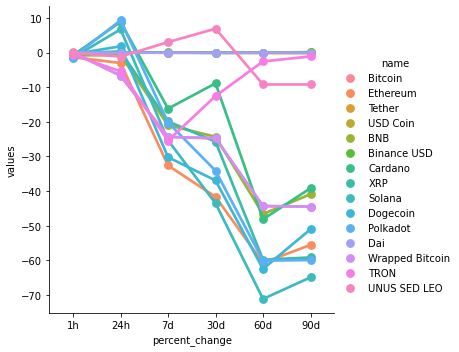

In [15]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')